<a href="https://colab.research.google.com/github/musama00/Machine-Learning/blob/main/Machine_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

In [39]:
file_path = '/content/data.csv'  # Path to your data file
data = pd.read_csv(file_path)  # Load the dataset

# View first 5 rows of the dataset
data.head()

# Summarize the dataset
print("Summary of the dataset:\n", data.describe())

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Summary of the dataset:
               price   offer_price
count   5679.000000   5679.000000
mean    4945.126255   4007.745026
std     5344.881308   4761.543884
min     1346.000000    773.000000
25%     2942.000000   1968.000000
50%     3742.000000   2868.000000
75%     4646.000000   4048.000000
max    37947.000000  34123.000000
Missing values in each column:
 brand          0
color          0
size           0
price          0
offer_price    0
dtype: int64


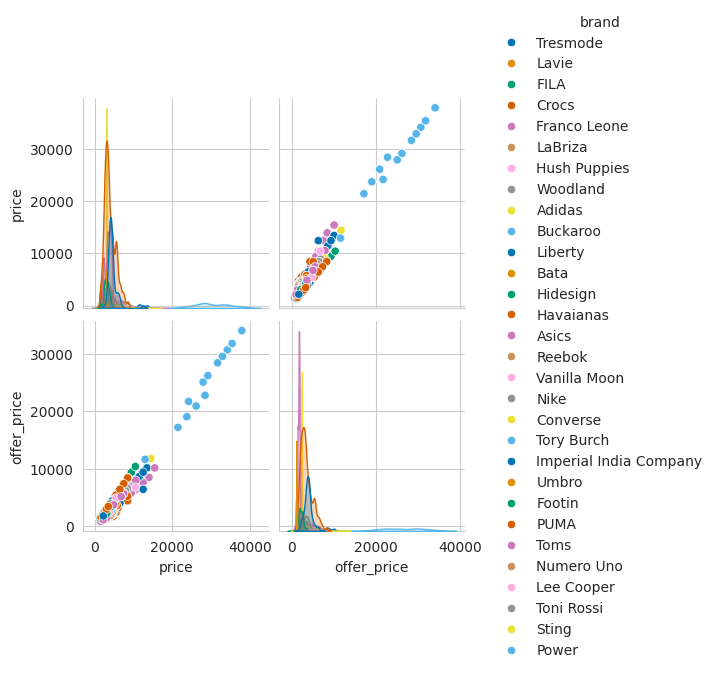

In [40]:
sns.pairplot(data, hue='brand', palette='colorblind')

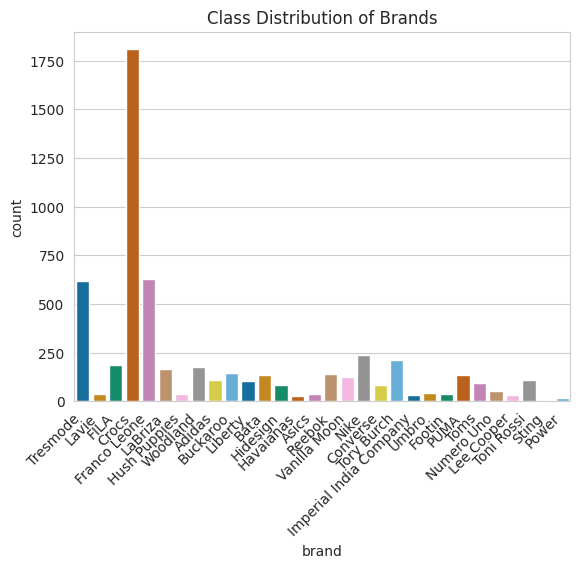

In [41]:
# Set a clean style for the plot
sns.set_style('whitegrid')

# Create the countplot with hue assigned to 'brand' and legend disabled
sns.countplot(x='brand', hue='brand', data=data, palette='colorblind', dodge=False, legend=False)

# Rotate x-axis labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right', fontsize=10)

# Set title and show plot
plt.title('Class Distribution of Brands')
plt.show()


In [42]:
imputer = SimpleImputer(strategy='mean')
data['price'] = imputer.fit_transform(data[['price']])
scaler = MinMaxScaler()
data['price'] = scaler.fit_transform(data[['price']])

In [43]:
X = data[['price']].values
y = data['brand'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
k_values = [1, 3, 5, 7, 9]
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    results[k] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # zero_division=0 suppresses the warning
    }

    print(f"Accuracy with k={k}: {results[k]['accuracy']:.2f}")

Accuracy with k=1: 0.64
Accuracy with k=3: 0.64
Accuracy with k=5: 0.63
Accuracy with k=7: 0.62
Accuracy with k=9: 0.62


<Axes: >

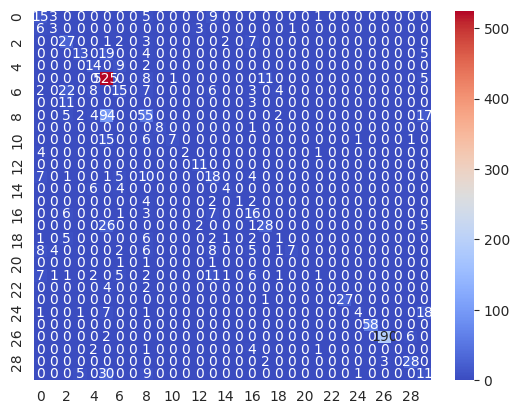

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')

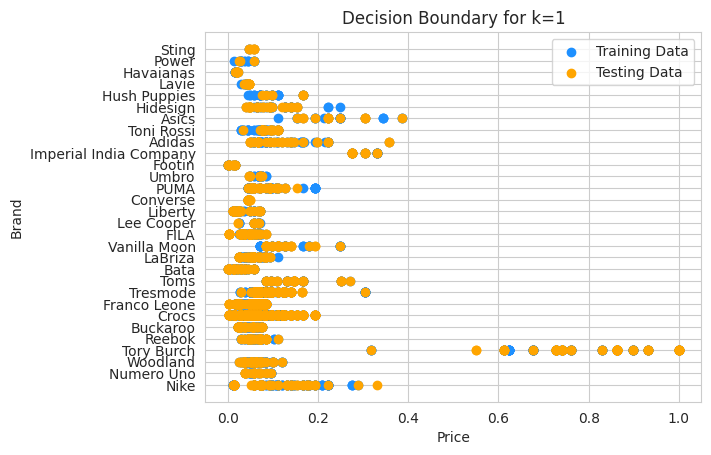

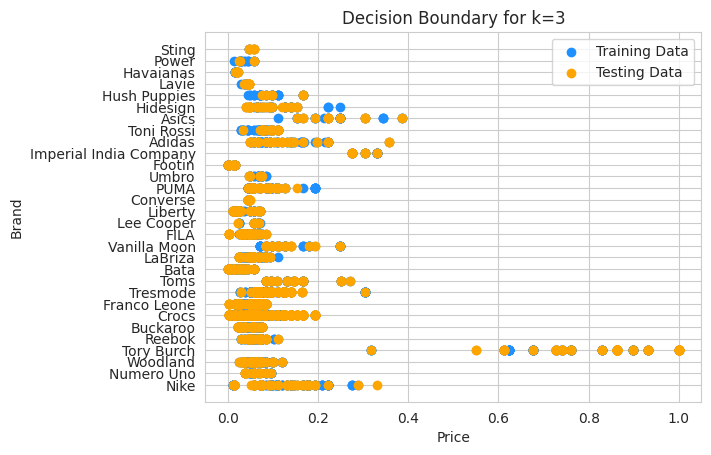

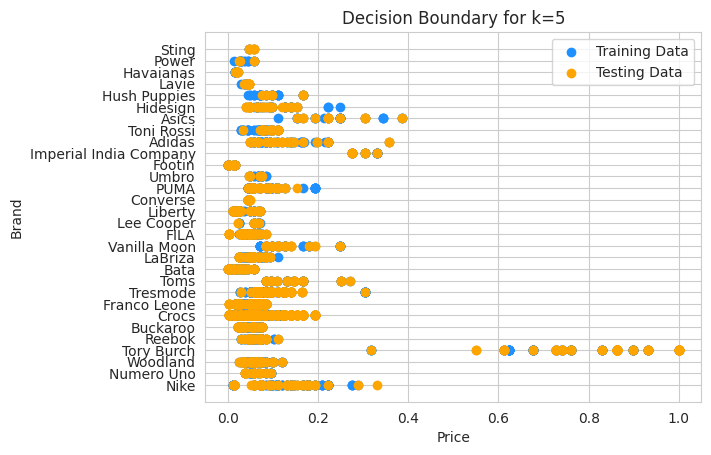

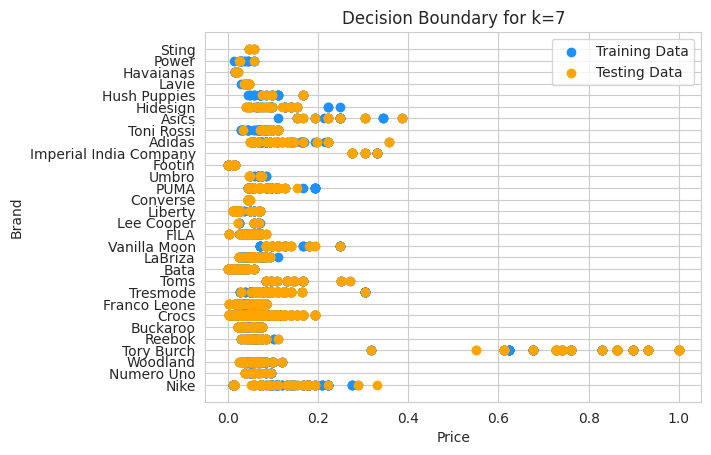

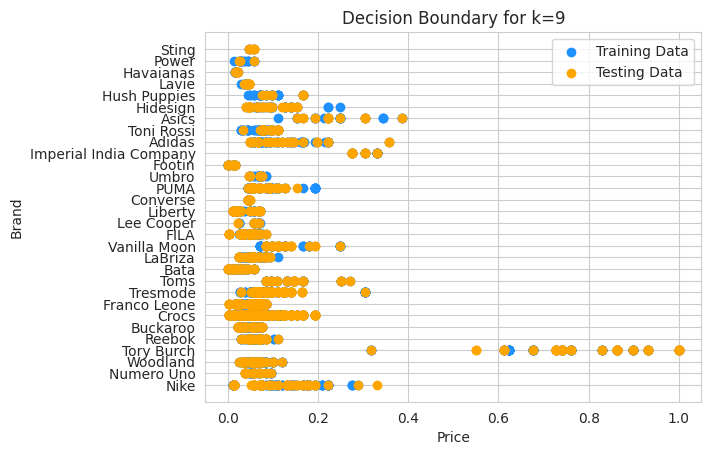

In [46]:
for k in k_values:
    plt.figure()
    plt.scatter(X_train, y_train, c='dodgerblue', label='Training Data')
    plt.scatter(X_test, y_test, c='orange', label='Testing Data')
    plt.title(f'Decision Boundary for k={k}')
    plt.xlabel('Price')
    plt.ylabel('Brand')
    plt.legend()
    plt.show()

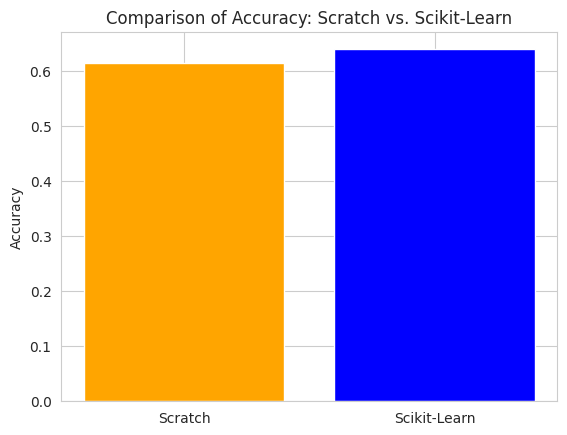

In [47]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn_from_scratch(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        sorted_indices = np.argsort(distances)[:k]
        nearest_labels = [y_train[i] for i in sorted_indices]
        predictions.append(max(set(nearest_labels), key=nearest_labels.count))
    return predictions

predictions = knn_from_scratch(X_train, y_train, X_test, k=3)

# Plot accuracy comparison
accuracies = [accuracy_score(y_test, predictions), accuracy_score(y_test, y_pred)]
methods = ['Scratch', 'Scikit-Learn']

plt.bar(methods, accuracies, color=['orange', 'blue'])
plt.title('Comparison of Accuracy: Scratch vs. Scikit-Learn')
plt.ylabel('Accuracy')
plt.show()

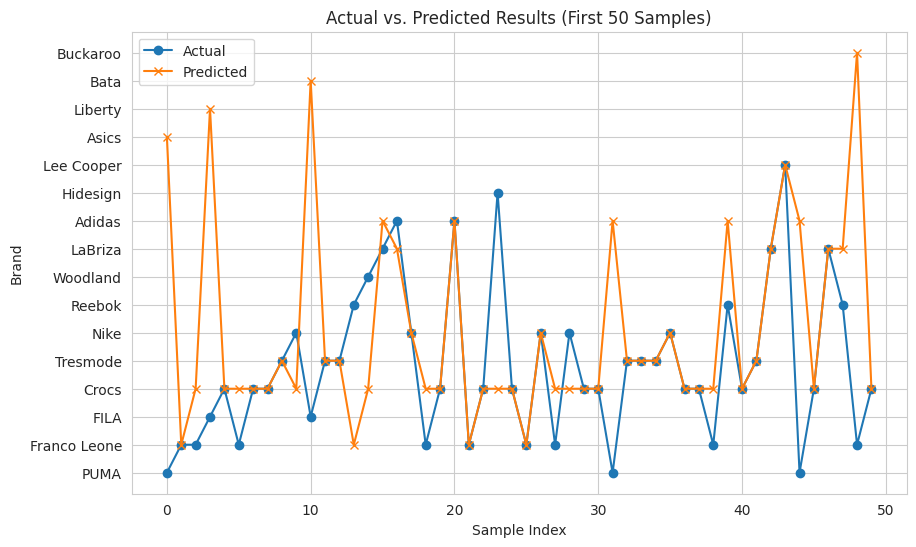

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title('Actual vs. Predicted Results (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Brand')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-49-4a222d409238>:29: RuntimeWarning: invalid value encountered in divide
  specificity = tp / (tp + fp)


Accuracy Score: 0.6390845070422535
Precision Score: 0.6299740961271267
Recall (True Positive Rate): 0.6390845070422535
F1 Score: 0.606222260461637
ROC Area: 0.5558066415032423
Mean Absolute Error: 3.3045774647887325
True Positive Rate (TPR): [0.45454545 0.23076923 0.64285714 0.31707317 0.56       0.95454545
 0.2238806  0.         0.30726257 0.88888889 0.23333333 0.28571429
 1.         0.39130435 0.28571429 0.11111111 0.48484848 0.4516129
 0.05555556 0.17073171 0.         0.02631579 0.         0.96428571
 0.125      1.         0.95959596 0.         0.84848485 0.19642857]
False Positive Rate (FPR): [0.52173913 0.38095238 0.5483871  0.16326531 0.46808511 0.26568758
 0.30208333 0.         0.30888031 0.         0.03225806 0.
 0.3125     0.5        0.22222222 0.         0.53521127 0.18421053
 0.30769231 0.02380952 0.         0.07317073 0.         0.
 0.05882353 0.         0.01492537 0.         0.175      0.47169811]
Specificity: [0.29411765 0.27272727 0.34615385 0.61904762 0.38888889 0.72513

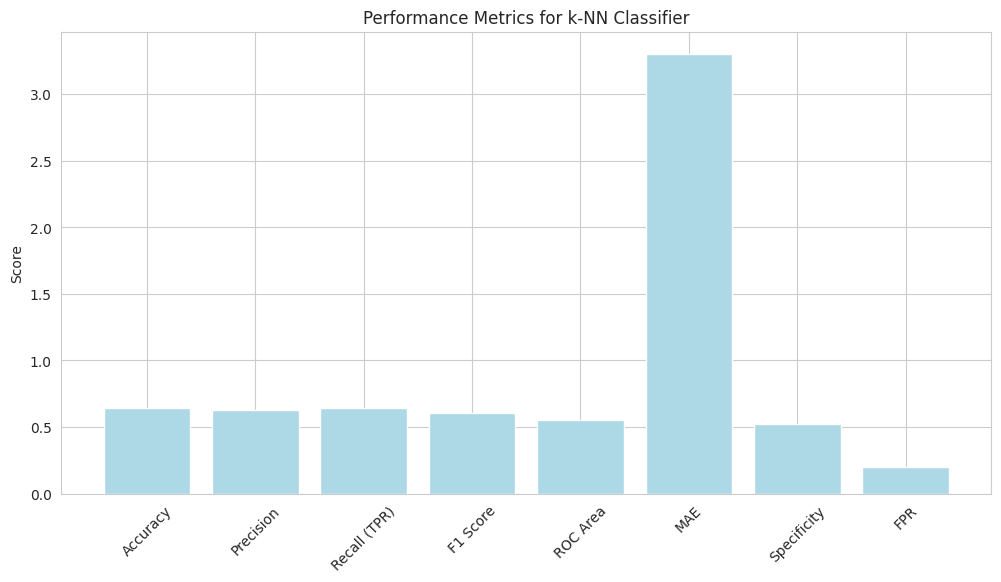

In [49]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate various performance metrics
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test_encoded), pd.get_dummies(y_pred_encoded), multi_class='ovr')
mean_absolute_err = mean_absolute_error(y_test_encoded, y_pred_encoded)

# Print all performance metrics
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall (True Positive Rate):", recall)
print("F1 Score:", f1)
print("ROC Area:", roc_auc)
print("Mean Absolute Error:", mean_absolute_err)

# Calculate True Positive Rate, False Positive Rate, and Specificity
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
tp = np.diag(cm)  # True Positives
fp = cm.sum(axis=0) - tp  # False Positives
fn = cm.sum(axis=1) - tp  # False Negatives
specificity = tp / (tp + fp)
false_positive_rate = fp / (fp + cm.sum(axis=1))
true_positive_rate = tp / (tp + fn)

# Replace NaN values with 0 for any undefined metrics
specificity = np.nan_to_num(specificity)
false_positive_rate = np.nan_to_num(false_positive_rate)
true_positive_rate = np.nan_to_num(true_positive_rate)

print("True Positive Rate (TPR):", true_positive_rate)
print("False Positive Rate (FPR):", false_positive_rate)
print("Specificity:", specificity)


# Plot final results for better visualization
metrics_names = ['Accuracy', 'Precision', 'Recall (TPR)', 'F1 Score', 'ROC Area', 'MAE', 'Specificity', 'FPR']
metrics_values = [accuracy, precision, recall, f1, roc_auc, mean_absolute_err, np.mean(specificity), np.mean(false_positive_rate)]

plt.figure(figsize=(12, 6))
plt.bar(metrics_names, metrics_values, color='lightblue')
plt.title('Performance Metrics for k-NN Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


In [50]:
# Single Prediction - Use DataFrame to maintain feature names
new_price = pd.DataFrame([[200]], columns=['price'])  # Create DataFrame with the same feature name
new_price_scaled = scaler.transform(new_price)  # Scale the input
prediction = knn.predict(new_price_scaled)  # Predict the brand
predicted_brand = prediction[0]  # Extract the predicted label
print("Predicted Brand for price=200 is:", predicted_brand)


Predicted Brand for price=200 is: Bata
